<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

# PARTIE 1 : EDA et Preprocessing

## Etape 1 : Imports et chargement des donnees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Charger le dataset
df = pd.read_csv('Walmart_Store_sales.csv')

print(f"Dataset : {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

Dataset : 150 lignes, 8 colonnes


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [4]:
# Valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
print(f"\nPourcentage de valeurs manquantes :")
print((df.isnull().sum() / len(df) * 100).round(1))

Valeurs manquantes par colonne :
Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

Pourcentage de valeurs manquantes :
Store            0.0
Date            12.0
Weekly_Sales     9.3
Holiday_Flag     8.0
Temperature     12.0
Fuel_Price       9.3
CPI              8.0
Unemployment    10.0
dtype: float64


## Etape 2 : Analyse exploratoire (EDA)

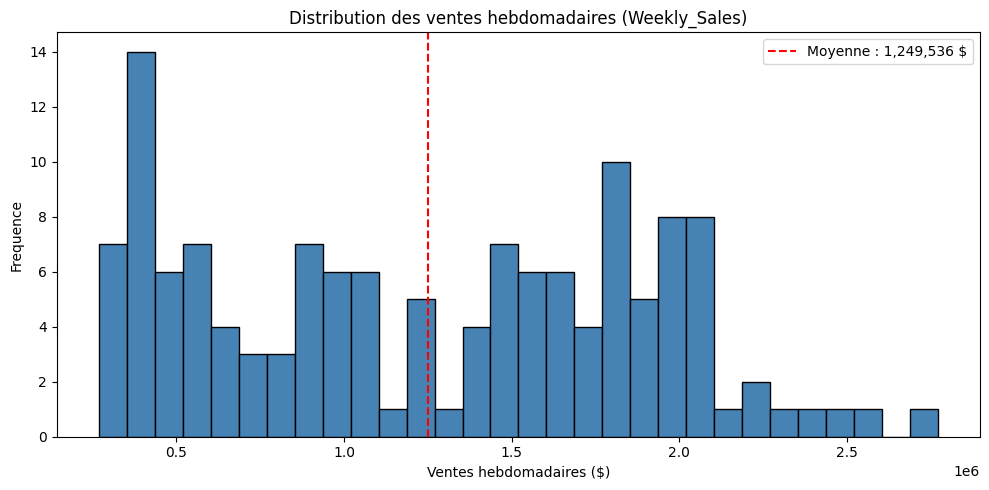

In [5]:
# Distribution de la variable cible : Weekly_Sales
plt.figure(figsize=(10, 5))
plt.hist(df['Weekly_Sales'].dropna(), bins=30, edgecolor='black', color='steelblue')
plt.title('Distribution des ventes hebdomadaires (Weekly_Sales)')
plt.xlabel('Ventes hebdomadaires ($)')
plt.ylabel('Frequence')
plt.axvline(df['Weekly_Sales'].mean(), color='red', linestyle='--', label=f"Moyenne : {df['Weekly_Sales'].mean():,.0f} $")
plt.legend()
plt.tight_layout()
plt.show()

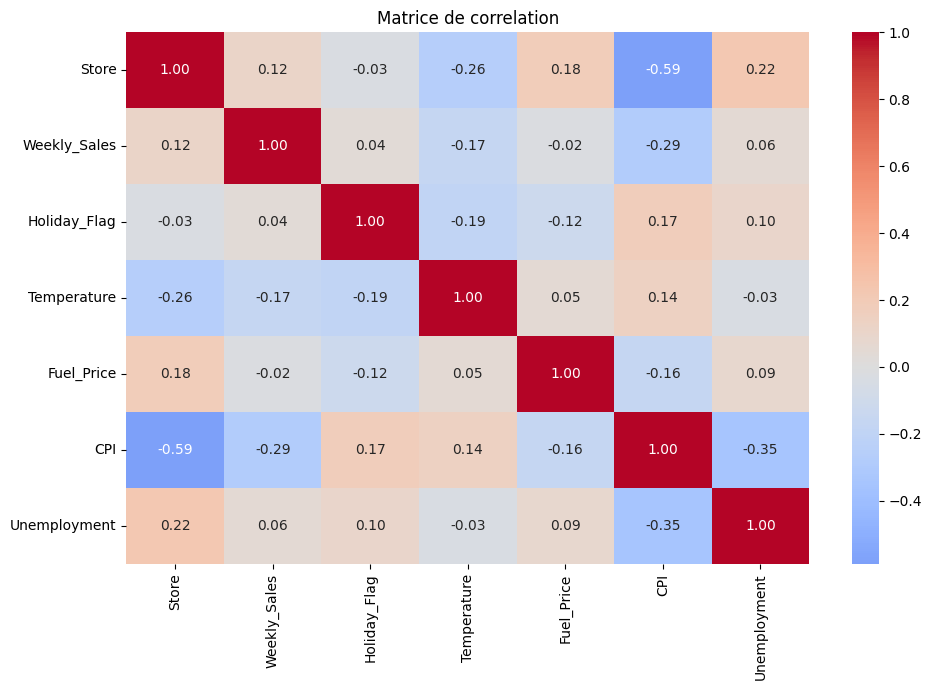

In [6]:
# Matrice de correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de correlation')
plt.tight_layout()
plt.show()

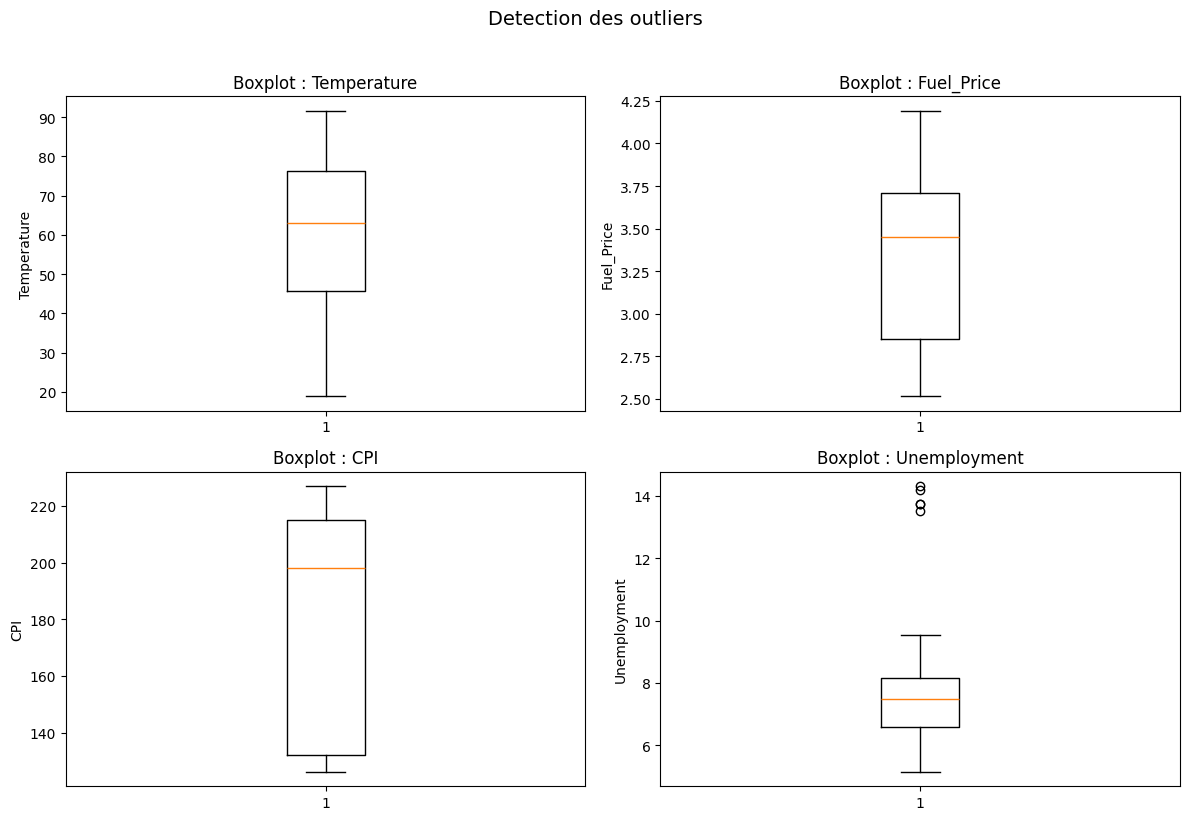

In [7]:
# Boxplots pour detecter les outliers sur les 4 colonnes cibles
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
outlier_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for idx, col in enumerate(outlier_cols):
    ax = axes[idx // 2, idx % 2]
    ax.boxplot(df[col].dropna())
    ax.set_title(f'Boxplot : {col}')
    ax.set_ylabel(col)

plt.suptitle('Detection des outliers', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

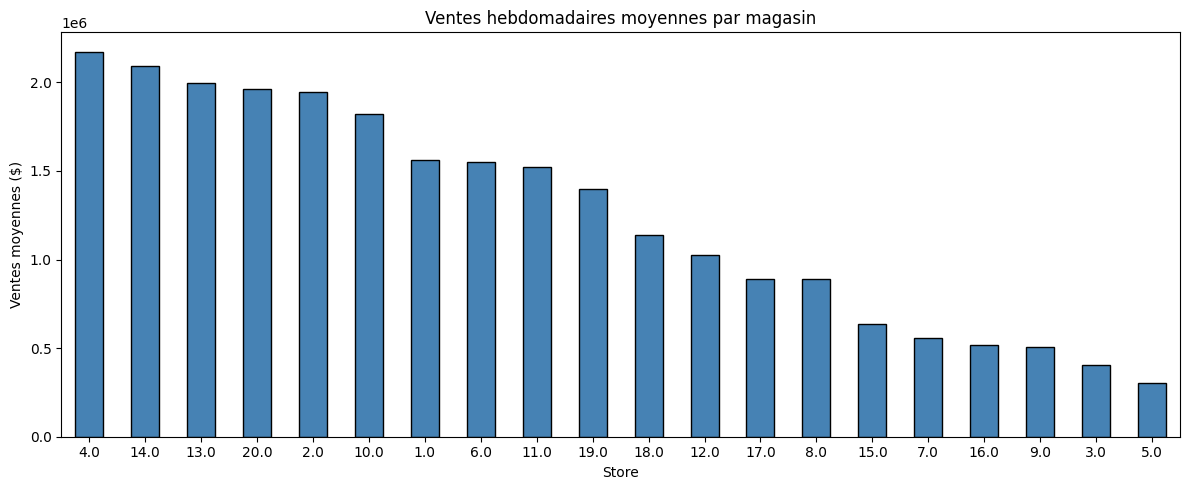

In [8]:
# Ventes moyennes par magasin
plt.figure(figsize=(12, 5))
sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
sales_by_store.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Ventes hebdomadaires moyennes par magasin')
plt.xlabel('Store')
plt.ylabel('Ventes moyennes ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

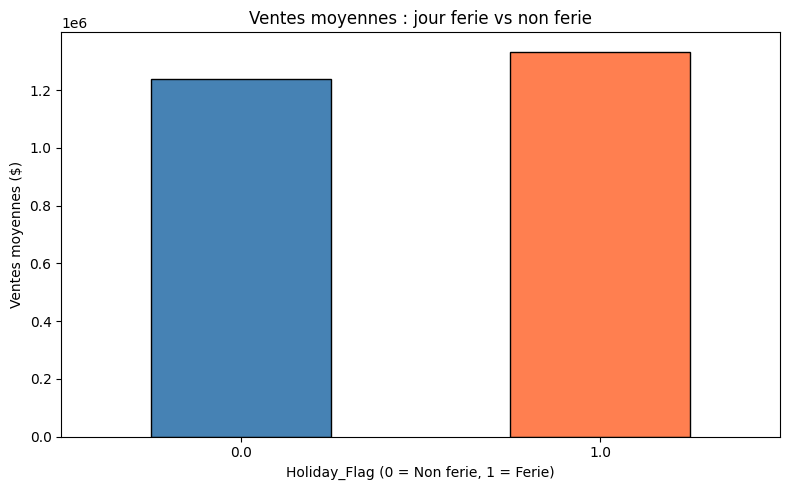

In [9]:
# Impact des jours feries sur les ventes
plt.figure(figsize=(8, 5))
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().plot(kind='bar', color=['steelblue', 'coral'], edgecolor='black')
plt.title('Ventes moyennes : jour ferie vs non ferie')
plt.xlabel('Holiday_Flag (0 = Non ferie, 1 = Ferie)')
plt.ylabel('Ventes moyennes ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Etape 3 : Nettoyage des donnees

In [10]:
# 1. Supprimer les lignes ou Weekly_Sales est manquant (jamais d'imputation sur la target)
print(f"Avant : {len(df)} lignes")
df_clean = df.dropna(subset=['Weekly_Sales']).copy()
print(f"Apres suppression NaN Weekly_Sales : {len(df_clean)} lignes ({len(df) - len(df_clean)} supprimees)")

Avant : 150 lignes
Apres suppression NaN Weekly_Sales : 136 lignes (14 supprimees)


In [11]:
# 2. Transformer la colonne Date en features numeriques
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['DayOfWeek'] = df_clean['Date'].dt.dayofweek  # 0=Lundi, 6=Dimanche

# Supprimer la colonne Date originale
df_clean = df_clean.drop('Date', axis=1)

print("Nouvelles colonnes creees a partir de Date :")
df_clean[['Year', 'Month', 'Day', 'DayOfWeek']].head()

Nouvelles colonnes creees a partir de Date :


,Year,Month,Day,DayOfWeek
0,2011.0,2.0,18.0,4.0
1,2011.0,3.0,25.0,4.0
3,NaN,NaN,NaN,NaN
4,2010.0,5.0,28.0,4.0
5,2010.0,5.0,28.0,4.0


In [12]:
# 3. Supprimer les lignes restantes avec des NaN (features manquantes)
print(f"NaN restants avant nettoyage :\n{df_clean.isnull().sum()}\n")
df_clean = df_clean.dropna()
print(f"Apres suppression de tous les NaN : {len(df_clean)} lignes")

NaN restants avant nettoyage :
Store            0
Weekly_Sales     0
Holiday_Flag    11
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
Year            18
Month           18
Day             18
DayOfWeek       18
dtype: int64

Apres suppression de tous les NaN : 75 lignes


In [13]:
# 4. Supprimer les outliers avec la regle des 3-sigma
# Colonnes concernees : Temperature, Fuel_Price, CPI, Unemployment
outlier_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

print(f"Avant suppression des outliers : {len(df_clean)} lignes\n")

for col in outlier_cols:
    mean = df_clean[col].mean()
    std = df_clean[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    
    n_before = len(df_clean)
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    n_removed = n_before - len(df_clean)
    
    print(f"{col} : intervalle [{lower:.2f}, {upper:.2f}] -> {n_removed} outlier(s) supprime(s)")

print(f"\nApres suppression des outliers : {len(df_clean)} lignes")

Avant suppression des outliers : 75 lignes

Temperature : intervalle [8.45, 112.49] -> 0 outlier(s) supprime(s)
Fuel_Price : intervalle [1.84, 4.81] -> 0 outlier(s) supprime(s)
CPI : intervalle [55.61, 296.54] -> 0 outlier(s) supprime(s)
Unemployment : intervalle [2.37, 12.95] -> 4 outlier(s) supprime(s)

Apres suppression des outliers : 71 lignes


In [14]:
# Verification du dataset nettoye
print(f"Shape final : {df_clean.shape}")
print(f"\nValeurs manquantes : {df_clean.isnull().sum().sum()}")
df_clean.head()

Shape final : (71, 11)

Valeurs manquantes : 0


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0,4.0
7,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0
10,8.0,895066.50,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0


## Etape 4 : Preparation des donnees pour le Machine Learning

In [15]:
# Separer X (features) et y (target)
X = df_clean.drop('Weekly_Sales', axis=1)
y = df_clean['Weekly_Sales']

# Identifier les types de variables
categorical_features = ['Store', 'Holiday_Flag']
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']

print(f"Features (X) : {X.shape}")
print(f"Target (y) : {y.shape}")
print(f"\nVariables categorielles : {categorical_features}")
print(f"Variables numeriques : {numerical_features}")

Features (X) : (71, 10)
Target (y) : (71,)

Variables categorielles : ['Store', 'Holiday_Flag']
Variables numeriques : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']


In [16]:
# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train : {X_train.shape[0]} lignes")
print(f"Test  : {X_test.shape[0]} lignes")

Train : 56 lignes
Test  : 15 lignes


In [18]:
# Preprocessing avec ColumnTransformer :
# - StandardScaler sur les variables numeriques
# - OneHotEncoder sur les variables categorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

# fit_transform sur le train, transform sur le test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape apres preprocessing :")
print(f"  X_train : {X_train_processed.shape}")
print(f"  X_test  : {X_test_processed.shape}")

Shape apres preprocessing :
  X_train : (56, 26)
  X_test  : (15, 26)


C:\Users\Emeline\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
# Recuperer les noms des features apres preprocessing
feature_names = (
    numerical_features 
    + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)
print(f"Nombre total de features apres encoding : {len(feature_names)}")
print(f"Features : {feature_names}")

Nombre total de features apres encoding : 26
Features : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


# PARTIE 2 : Modele Baseline (Regression Lineaire)

## Etape 5 : Entrainement du modele de regression lineaire

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Entrainer le modele
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Predictions sur train et test
y_train_pred = lr_model.predict(X_train_processed)
y_test_pred = lr_model.predict(X_test_processed)

print("Modele de regression lineaire entraine.")

Modele de regression lineaire entraine.


## Etape 6 : Evaluation des performances

In [21]:
# Fonction d'evaluation reutilisable
def evaluate_model(y_true, y_pred, dataset_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"=== {dataset_name} ===")
    print(f"  RMSE : {rmse:,.2f} $")
    print(f"  MAE  : {mae:,.2f} $")
    print(f"  R2   : {r2:.4f}")
    print()
    return {'rmse': rmse, 'mae': mae, 'r2': r2}

# Evaluer sur train et test
print("REGRESSION LINEAIRE\n")
lr_train_scores = evaluate_model(y_train, y_train_pred, "TRAIN")
lr_test_scores = evaluate_model(y_test, y_test_pred, "TEST")

# Diagnostic overfitting
r2_diff = lr_train_scores['r2'] - lr_test_scores['r2']
if r2_diff > 0.1:
    print(f"Ecart R2 train/test = {r2_diff:.4f} -> Signe d'overfitting")
else:
    print(f"Ecart R2 train/test = {r2_diff:.4f} -> Pas d'overfitting majeur")

REGRESSION LINEAIRE

=== TRAIN ===
  RMSE : 83,129.39 $
  MAE  : 66,020.21 $
  R2   : 0.9865

=== TEST ===
  RMSE : 149,684.57 $
  MAE  : 127,770.23 $
  R2   : 0.9313

Ecart R2 train/test = 0.0552 -> Pas d'overfitting majeur


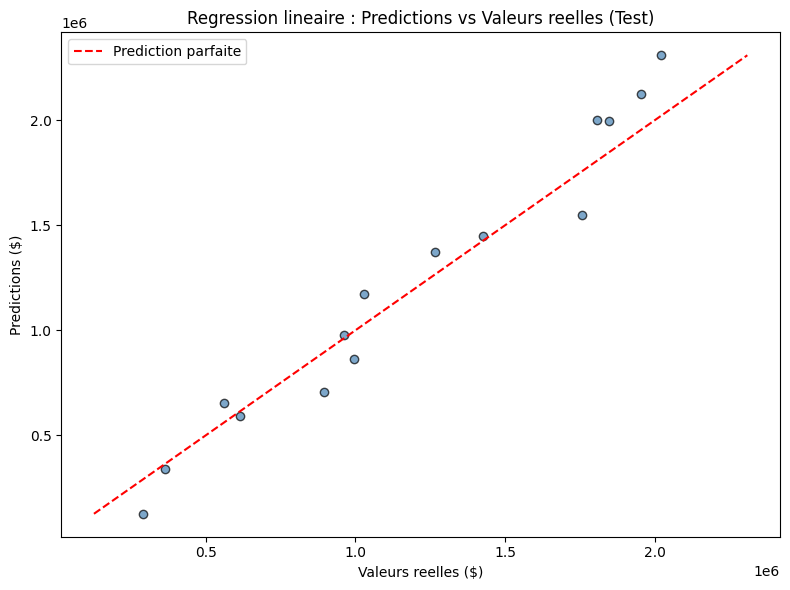

In [22]:
# Visualisation : predictions vs valeurs reelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='steelblue', edgecolor='black', alpha=0.7)

# Ligne de prediction parfaite
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Prediction parfaite')

plt.xlabel('Valeurs reelles ($)')
plt.ylabel('Predictions ($)')
plt.title('Regression lineaire : Predictions vs Valeurs reelles (Test)')
plt.legend()
plt.tight_layout()
plt.show()

## Etape 7 : Interpretation des coefficients

In [23]:
# Analyser les coefficients du modele
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(f"Intercept : {lr_model.intercept_:,.2f}\n")
print("Coefficients tries par importance :")
print(coef_df.to_string(index=False))

Intercept : 986,225.82

Coefficients tries par importance :
         Feature   Coefficient  Abs_Coefficient
       Store_4.0  2.112972e+06     2.112972e+06
      Store_13.0  1.975536e+06     1.975536e+06
      Store_10.0  1.909599e+06     1.909599e+06
       Store_5.0 -1.374982e+06     1.374982e+06
       Store_9.0 -1.332161e+06     1.332161e+06
       Store_3.0 -1.310759e+06     1.310759e+06
      Store_19.0  1.310019e+06     1.310019e+06
      Store_14.0  1.259366e+06     1.259366e+06
      Store_18.0  9.904759e+05     9.904759e+05
       Store_8.0 -8.982085e+05     8.982085e+05
      Store_16.0 -7.481323e+05     7.481323e+05
             CPI  7.148366e+05     7.148366e+05
       Store_7.0 -6.511288e+05     6.511288e+05
      Store_17.0  6.182832e+05     6.182832e+05
      Store_15.0  6.015770e+05     6.015770e+05
      Store_20.0  5.140257e+05     5.140257e+05
       Store_2.0  2.093604e+05     2.093604e+05
Holiday_Flag_1.0 -1.416612e+05     1.416612e+05
       Store_6.0  1.245011e+

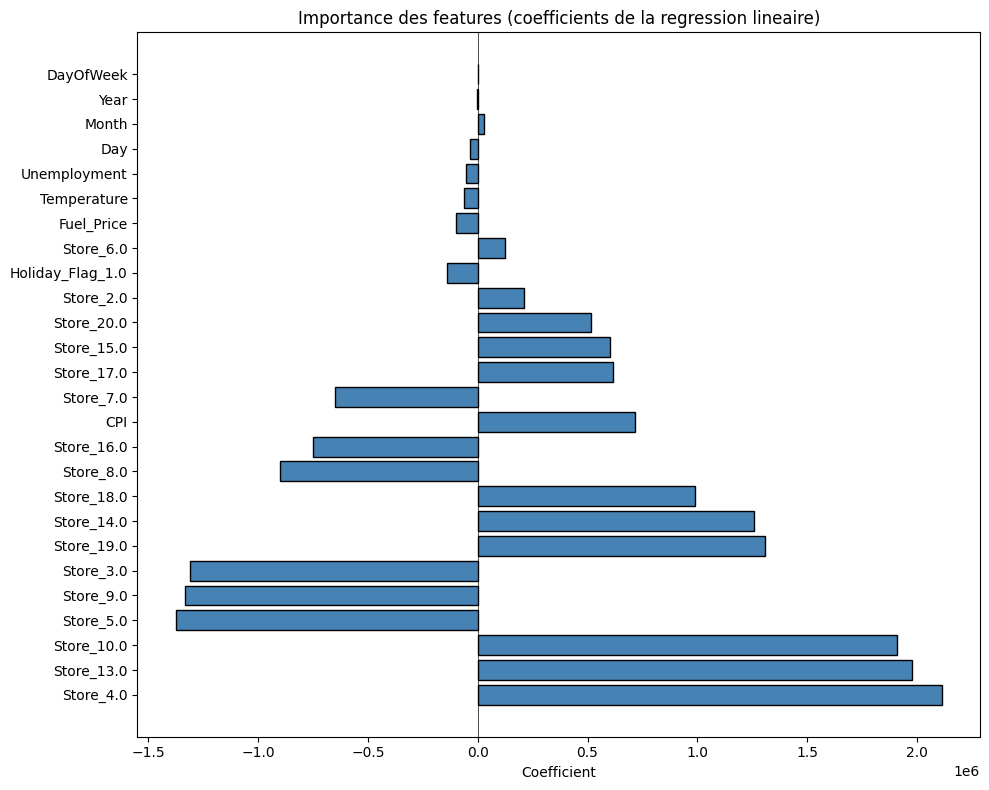

In [24]:
# Visualisation des coefficients
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue', edgecolor='black')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.xlabel('Coefficient')
plt.title('Importance des features (coefficients de la regression lineaire)')
plt.tight_layout()
plt.show()

# PARTIE 3 : Regularisation (Ridge et Lasso)

## Etape 8 : Modele Ridge

In [25]:
from sklearn.linear_model import Ridge, Lasso

# Entrainer Ridge avec alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_processed)
y_test_pred_ridge = ridge_model.predict(X_test_processed)

print("RIDGE (alpha=1.0)\n")
ridge_train_scores = evaluate_model(y_train, y_train_pred_ridge, "TRAIN")
ridge_test_scores = evaluate_model(y_test, y_test_pred_ridge, "TEST")

RIDGE (alpha=1.0)

=== TRAIN ===
  RMSE : 208,798.23 $
  MAE  : 164,563.08 $
  R2   : 0.9148

=== TEST ===
  RMSE : 225,939.89 $
  MAE  : 173,517.99 $
  R2   : 0.8434



## Etape 9 : Modele Lasso

In [26]:
# Entrainer Lasso avec alpha=1.0
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_processed, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_processed)
y_test_pred_lasso = lasso_model.predict(X_test_processed)

print("LASSO (alpha=1.0)\n")
lasso_train_scores = evaluate_model(y_train, y_train_pred_lasso, "TRAIN")
lasso_test_scores = evaluate_model(y_test, y_test_pred_lasso, "TEST")

# Montrer les coefficients mis a zero par Lasso
lasso_coef = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_model.coef_})
n_zero = (lasso_coef['Coefficient'] == 0).sum()
print(f"Lasso a mis {n_zero} coefficient(s) a zero (selection de features automatique)")
if n_zero > 0:
    print(f"Features eliminees : {lasso_coef[lasso_coef['Coefficient'] == 0]['Feature'].tolist()}")

LASSO (alpha=1.0)

=== TRAIN ===
  RMSE : 84,298.24 $
  MAE  : 67,370.20 $
  R2   : 0.9861

=== TEST ===
  RMSE : 152,135.89 $
  MAE  : 126,751.42 $
  R2   : 0.9290

Lasso a mis 1 coefficient(s) a zero (selection de features automatique)
Features eliminees : ['DayOfWeek']


C:\Users\Emeline\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.982e+11, tolerance: 2.866e+09
  model = cd_fast.enet_coordinate_descent(


## Etape 10 (BONUS) : Optimisation de alpha avec GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV pour Ridge
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_ridge = GridSearchCV(
    Ridge(),
    param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0
)
grid_ridge.fit(X_train_processed, y_train)

print("=== RIDGE - GridSearchCV ===")
print(f"Meilleur alpha : {grid_ridge.best_params_['alpha']}")
print(f"Meilleur score CV (neg MSE) : {grid_ridge.best_score_:,.2f}\n")

y_test_pred_best_ridge = grid_ridge.best_estimator_.predict(X_test_processed)
best_ridge_scores = evaluate_model(y_test, y_test_pred_best_ridge, "TEST - Best Ridge")

=== RIDGE - GridSearchCV ===
Meilleur alpha : 0.1
Meilleur score CV (neg MSE) : -113,118,292,819.20

=== TEST - Best Ridge ===
  RMSE : 143,863.42 $
  MAE  : 117,536.26 $
  R2   : 0.9365



In [28]:
# GridSearchCV pour Lasso
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(
    Lasso(),
    param_grid_lasso,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0
)
grid_lasso.fit(X_train_processed, y_train)

print("=== LASSO - GridSearchCV ===")
print(f"Meilleur alpha : {grid_lasso.best_params_['alpha']}")
print(f"Meilleur score CV (neg MSE) : {grid_lasso.best_score_:,.2f}\n")

y_test_pred_best_lasso = grid_lasso.best_estimator_.predict(X_test_processed)
best_lasso_scores = evaluate_model(y_test, y_test_pred_best_lasso, "TEST - Best Lasso")

=== LASSO - GridSearchCV ===
Meilleur alpha : 0.001
Meilleur score CV (neg MSE) : -113,475,354,266.03

=== TEST - Best Lasso ===
  RMSE : 152,156.13 $
  MAE  : 126,770.60 $
  R2   : 0.9290



C:\Users\Emeline\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.929e+10, tolerance: 2.251e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Emeline\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+11, tolerance: 2.264e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Emeline\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

## Comparaison finale des modeles

In [29]:
# Tableau comparatif de tous les modeles
comparison = pd.DataFrame({
    'Modele': [
        'Linear Regression',
        'Ridge (alpha=1)',
        'Lasso (alpha=1)',
        f'Ridge GridSearch (alpha={grid_ridge.best_params_["alpha"]})',
        f'Lasso GridSearch (alpha={grid_lasso.best_params_["alpha"]})'
    ],
    'R2 Test': [
        lr_test_scores['r2'],
        ridge_test_scores['r2'],
        lasso_test_scores['r2'],
        best_ridge_scores['r2'],
        best_lasso_scores['r2']
    ],
    'RMSE Test': [
        lr_test_scores['rmse'],
        ridge_test_scores['rmse'],
        lasso_test_scores['rmse'],
        best_ridge_scores['rmse'],
        best_lasso_scores['rmse']
    ]
})

comparison = comparison.sort_values('R2 Test', ascending=False)
print("=== COMPARAISON FINALE ===\n")
print(comparison.to_string(index=False))

=== COMPARAISON FINALE ===

                        Modele  R2 Test     RMSE Test
  Ridge GridSearch (alpha=0.1) 0.936520 143863.424328
             Linear Regression 0.931279 149684.574574
               Lasso (alpha=1) 0.929010 152135.890673
Lasso GridSearch (alpha=0.001) 0.928991 152156.131014
               Ridge (alpha=1) 0.843426 225939.893247


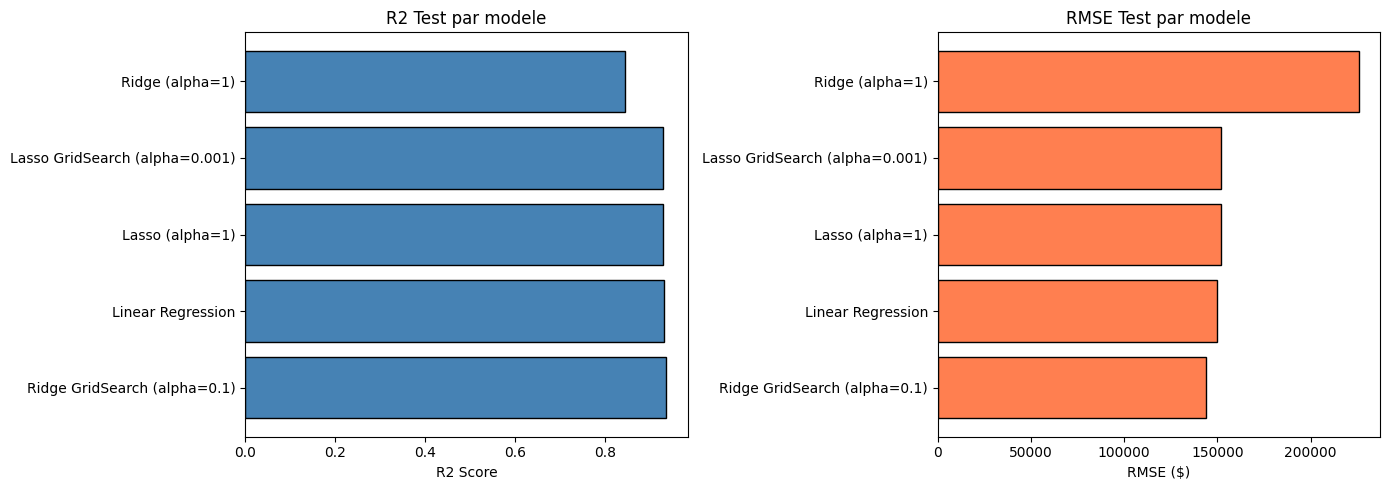

In [30]:
# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R2
axes[0].barh(comparison['Modele'], comparison['R2 Test'], color='steelblue', edgecolor='black')
axes[0].set_xlabel('R2 Score')
axes[0].set_title('R2 Test par modele')

# RMSE
axes[1].barh(comparison['Modele'], comparison['RMSE Test'], color='coral', edgecolor='black')
axes[1].set_xlabel('RMSE ($)')
axes[1].set_title('RMSE Test par modele')

plt.tight_layout()
plt.show()